In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
from nengo_spa.pointer import SemanticPointer

In [3]:
from cue.utils.plotting import row_height, save_tight_fig, single_fig_size, style, textwidth

In [5]:
style()

In [52]:
beta = 0.62676
theta = np.sqrt(1. - beta)
d = 256

In [53]:
def ctx_sim(lag):
    return theta**np.abs(lag)

In [65]:
def ctx_in_sim(lag):
    return np.select([lag < 0], [0.], beta * theta**xs)

/home/jgosmann/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/mathtext.py:839: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


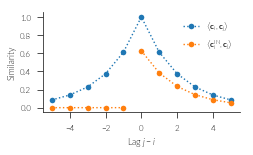

In [81]:
fig = plt.figure(figsize=single_fig_size)
ax = fig.add_subplot(1, 1, 1)

xs = np.arange(-5, 6)
ax.plot(xs, ctx_sim(xs), 'o:', label=r"$\langle \mathbf{c}_i, \mathbf{c}_j \rangle$")

ys = ctx_in_sim(xs)
pos = np.where(ys > 0)[0][0]
xs2 = np.insert(np.asfarray(xs), pos, np.nan)
ys2 = np.insert(ys, pos, np.nan)
plt.plot(xs2, ys2, 'o:', label=r"$\langle \mathbf{c}^{\mathrm{IN}}_i, \mathbf{c}_j \rangle$")

ax.set_xlabel("Lag $j - i$")
ax.set_ylabel("Similarity")
ax.legend(loc='best')

sns.despine(fig)
fig.tight_layout()

In [82]:
save_tight_fig(fig, "../../../phd-thesis/figures/ctxsim.pdf")

/home/jgosmann/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/mathtext.py:839: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)
